In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data exploration

In [2]:
# do this to make Pandas show all the columns of a DataFrame, otherwise it just shows a summary
pd.set_option('display.max_columns', None) 

In [3]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

train_id = df_train['Id']
test_id = df_test['Id']

train_idhogar = df_train['idhogar']
test_idhogar = df_train['idhogar']

df_train.drop(columns=['Id', 'idhogar'], inplace=True)
df_test.drop(columns=['Id', 'idhogar'], inplace=True)

print("Shape of train data: ", df_train.shape)
print("Shape of test data: ", df_test.shape)

ntrain = df_train.shape[0]
ntest = df_test.shape[0]

all_data = pd.concat((df_train, df_test)).reset_index(drop=True)

Shape of train data:  (9557, 141)
Shape of test data:  (23856, 140)


In [4]:
print("A glimpse at the columns of training data:")
df_train.head()

A glimpse at the columns of training data:


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
print("The feature that we need to predict: ", set(df_train.columns) - set(df_test.columns))

The feature that we need to predict:  {'Target'}


Let's see a description of `Target`: 

In [6]:
df_train['Target'].describe()

count    9557.000000
mean        3.302292
std         1.009565
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: Target, dtype: float64

In [7]:
def barplot_with_anotate(feature_list, y_values, plotting_space=plt, annotate_vals=None):
    x_pos = np.arange(len(feature_list))
    plotting_space.bar(x_pos, y_values);
    plotting_space.xticks(x_pos, feature_list, rotation=270);
    if annotate_vals == None:
        annotate_vals = y_values
    for i in range(len(feature_list)):
        plotting_space.text(x=x_pos[i]-0.3, y=y_values[i]+1.0, s=annotate_vals[i]);

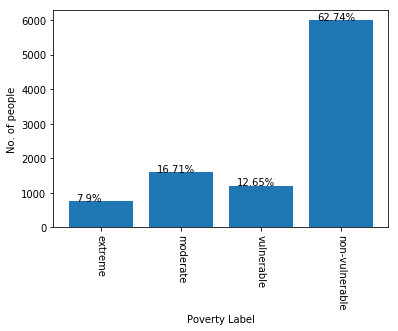

In [8]:
poverty_label_sizes = list(df_train.groupby('Target').size())

barplot_with_anotate(['extreme', 'moderate', 'vulnerable', 'non-vulnerable'], poverty_label_sizes,
                     annotate_vals = [str(round((count/df_train.shape[0])*100, 2))+'%' 
                                      for count in poverty_label_sizes]);
plt.rcParams["figure.figsize"] = [6, 6];
plt.xlabel('Poverty Label');
plt.ylabel('No. of people');

So, we can conclude that **_a majority (67.74%) of the individuals fall within the `Non-vulnerable` category_**. This is follwed by `moderate`(16.71%) -> `vulnerable` (12.65%) -> `extreme` (7.9%).

Now, let's try to understand what it means to live under such conditions.

In [9]:
def plot_dwelling_property(property_df):
    _, axarr = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row')

    target_idx = 0
    for row in range(2):
        for col in range(2):
            percentage_list = [round((count/poverty_label_sizes[target_idx])*100, 2)
                                 for count in list(property_df.iloc[target_idx, :])]
            x_pos = list(range(len(property_df.columns)))
            
            axarr[row, col].bar(x_pos, 
                                percentage_list, 
                                color='y')
            
            axarr[row, col].set_title('For individuals in Poverty group=' + str(target_idx+1))
            
            xtick_labels = list(property_df.columns)
            xtick_labels.insert(0, '') # insert a blank coz `set_xticklabels()` skips the 1st element ##why??
            axarr[row, col].set_xticklabels(xtick_labels, rotation=300)
            
            axarr[row, col].set_ylim(bottom=0, top=100)
            #axarr[row, col].set_xlim(left=0, right=len(property_df.columns))
            
            for i in range(len(property_df.columns)):
                axarr[row, col].annotate(xy=(x_pos[i]-0.3, percentage_list[i]+1.0), s=percentage_list[i]);
            
            axarr[0, 0].set_ylabel("Percentage of the total in this poverty group");
            axarr[1, 0].set_ylabel("Percentage of the total in this poverty group");
            axarr[1, 0].set_xlabel("Types of material");
            axarr[1, 1].set_xlabel("Types of material");

            axarr[row, col].autoscale(enable=True, axis='x')
            target_idx+=1

    plt.rcParams["figure.figsize"] = [16, 16];

### Outside wall material of the house:

In [10]:
outside_wall_material_df = df_train.groupby('Target').sum()[['paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 
                                  'paredzinc', 'paredfibras', 'paredother']]
outside_wall_material_df

,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother
Target,,,,,,,,
1,295,81,187,12,154,24,2,0
2,609,181,392,42,327,34,7,5
3,620,118,282,11,174,4,0,0
4,4153,363,936,17,450,63,5,9


```
paredblolad, =1 if predominant material on the outside wall is block or brick
paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
pareddes, =1 if predominant material on the outside wall is waste material
paredmad, =1 if predominant material on the outside wall is wood
paredzinc, =1 if predominant material on the outside wall is zink
paredfibras, =1 if predominant material on the outside wall is natural fibers
paredother, =1 if predominant material on the outside wall is other
```

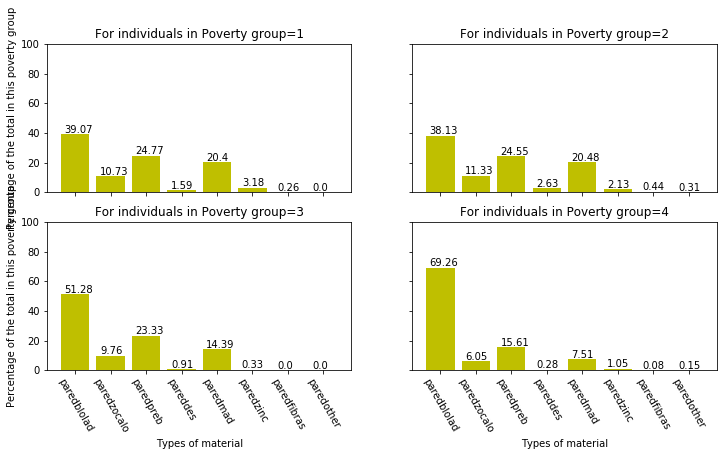

In [46]:
plot_dwelling_property(outside_wall_material_df)

* We see that a majority (69.26%) of the people living under poverty group 4 (non-vulnerable) have brick wall on the outside. 
* As we go from there to group 1 (extreme), the percentage of people having brick wall decreases. Cement wall and wood walls become increasingly more common.
* The top 3 most common types of wall material across all the groups are (in descending order of popularity) - 
  `brick` > `prefabricated or cement` > `wood`

### Floor material of the house:

In [12]:
floor_material_df = df_train.groupby('Target').sum()[['pisomoscer', 'pisocemento', 'pisoother',
                                                      'pisonatur', 'pisonotiene', 'pisomadera']]
floor_material_df

,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera
Target,,,,,,
1,352,285,0,1,33,84
2,789,561,0,9,62,176
3,738,334,0,0,23,114
4,4742,950,9,0,39,256


```
pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
pisocemento, =1 if predominant material on the floor is cement
pisoother, =1 if predominant material on the floor is other
pisonatur, =1 if predominant material on the floor is  natural material
pisonotiene, =1 if no floor at the household
pisomadera, =1 if predominant material on the floor is wood
```

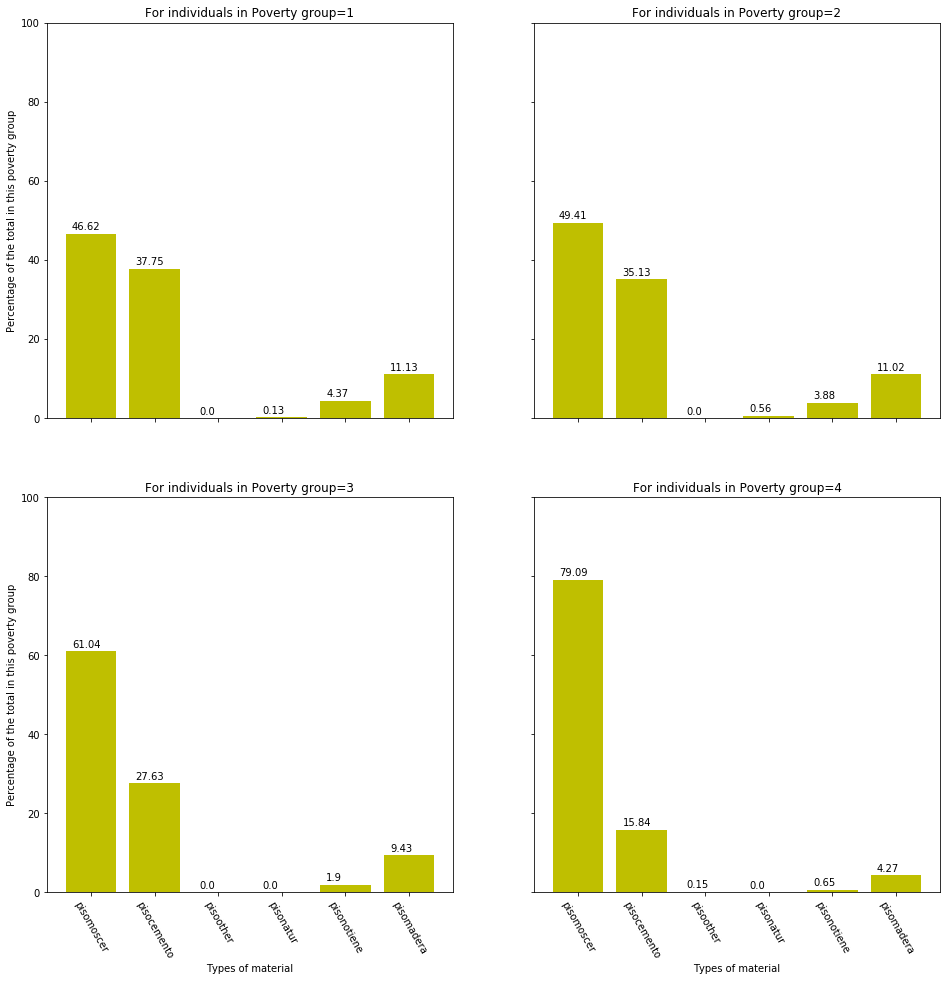

In [13]:
plot_dwelling_property(floor_material_df)

* We see that a majority of people living under poverty group 3 (vulnerable) and group 2 (moderate) have `mossaic, ceramic, tazzo` floors (61.04% and 79.09% respectively)
* This floor type becomes less common as we move across from group 4 to group 1 and other types (especially the cemented floors) become more common.
* The top 3 most common types of floors across all the groups are (in descending order of popularity) - 
  `mossaic, ceramic, tazzo` > `cemented` > `wooden`

### Toilet:

In [14]:
toilet_df = df_train.groupby('Target').sum()[['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5',
                                              'sanitario6']]
toilet_df

,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6
Target,,,,,
1,7,121,591,35,1
2,12,278,1250,47,10
3,9,157,1012,31,0
4,9,1489,4451,34,13


```
sanitario1, =1 no toilet in the dwelling
sanitario2, =1 toilet connected to sewer or cesspool
sanitario3, =1 toilet connected to  septic tank
sanitario5, =1 toilet connected to black hole or letrine
sanitario6, =1 toilet connected to other system
```

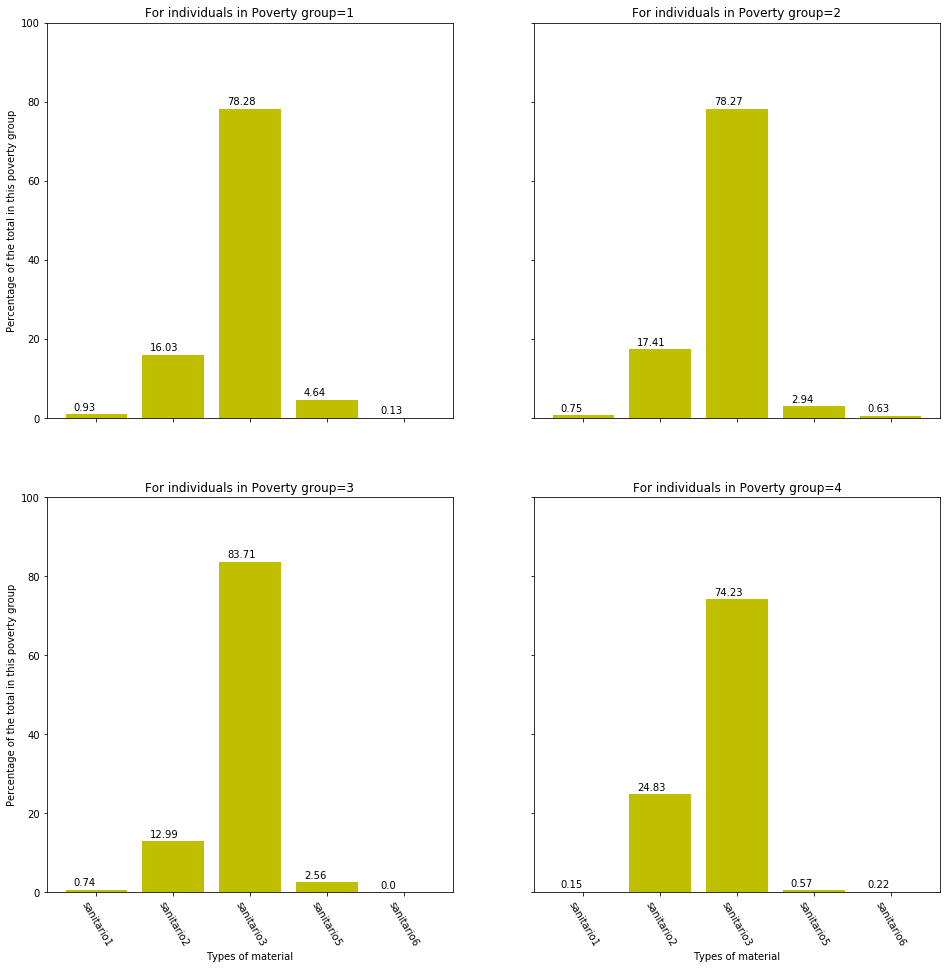

In [15]:
plot_dwelling_property(toilet_df)

* A large majority of the individuals across all classes live in homes with a toilet connected to a septic tank (74% - 84%).
* The second most common type is a toilet connected to a sewer. It is more common in poverty group 4 (non-vulnerable) than in other groups.

### Rubbish disposal:

In [16]:
rubbish_disposal_df = df_train.groupby('Target').sum()[['elimbasu1', 'elimbasu2', 'elimbasu3',
                                                        'elimbasu4', 'elimbasu5', 'elimbasu6']]
rubbish_disposal_df

,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6
Target,,,,,,
1,605,35,115,0,0,0
2,1282,82,222,11,0,0
3,1010,43,153,3,0,0
4,5539,127,318,0,0,12


```
elimbasu1, =1 if rubbish disposal mainly by tanker truck
elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
elimbasu3, =1 if rubbish disposal mainly by burning
elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
elimbasu6, =1 if rubbish disposal mainly other
```

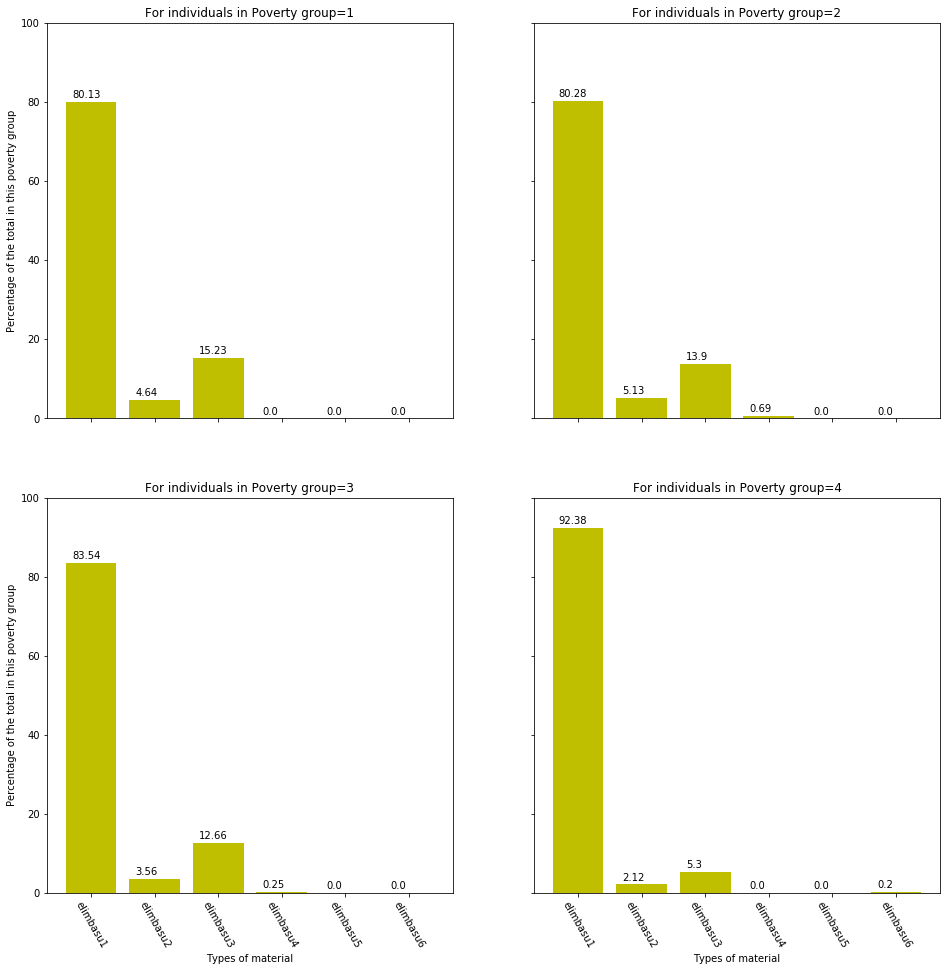

In [17]:
plot_dwelling_property(rubbish_disposal_df)

* A large majority of the people in all the poverty groups dispose their rubbish using tanker trucks.
* Rubbish disposal by burning is the 2nd most popular way and its popularity increases as we move from group 4 (non-vulnerable) to group 1 (extreme). This may be as a result of lack of environmental awareness or a lack of resources.

### Roof material of the house:

In [18]:
roof_material_df = df_train.groupby('Target').sum()[['techozinc', 'techoentrepiso', 'techocane', 'techootro']]
roof_material_df

,techozinc,techoentrepiso,techocane,techootro
Target,,,,
1,726,12,7,0
2,1523,26,8,0
3,1199,5,3,0
4,5823,126,12,21


```
techozinc, =1 if predominant material on the roof is metal foil or zink
techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
techocane, =1 if predominant material on the roof is natural fibers
techootro, =1 if predominant material on the roof is other
```

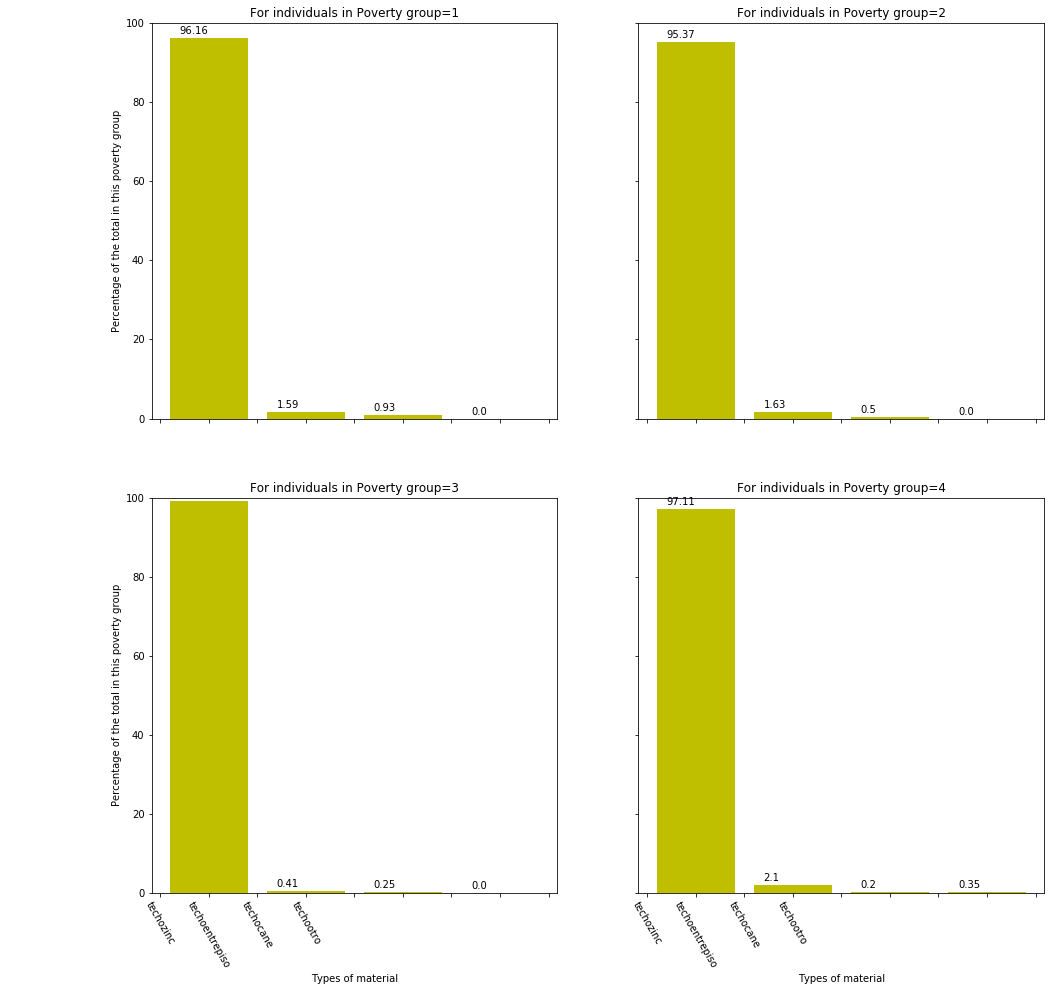

In [19]:
plot_dwelling_property(roof_material_df)

* This distrubution is pretty much the same throughout all the groups. A huge majority (> 95%) of the individuals live in homes with metal foil or zinc roof.

### Water provision:

In [20]:
water_provision_df = df_train.groupby('Target').sum()[['abastaguadentro', 'abastaguafuera', 'abastaguano']]
water_provision_df


,abastaguadentro,abastaguafuera,abastaguano
Target,,,
1,722,30,3
2,1496,78,23
3,1153,51,5
4,5849,144,3


```
abastaguadentro, =1 if water provision inside the dwelling
abastaguafuera, =1 if water provision outside the dwelling
abastaguano, =1 if no water provision
```

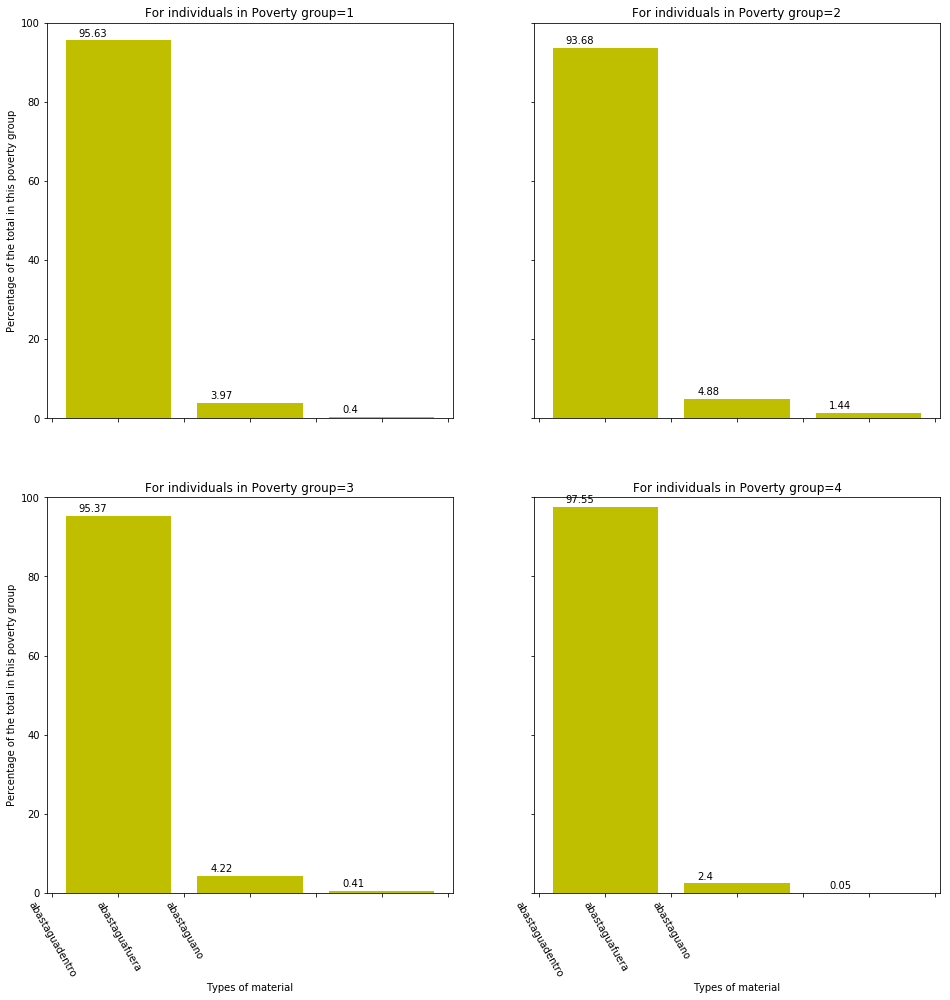

In [21]:
plot_dwelling_property(water_provision_df)

* Again, this distribution is also pretty much the same across all the groups. Almost all (~95%) of the people in all the groups enjoy water provision inside their dwellings.

### Electricity:

In [22]:
electricity_df = df_train.groupby('Target').sum()[['public', 'planpri', 'noelec', 'coopele']]
electricity_df

,public,planpri,noelec,coopele
Target,,,,
1,669,0,4,78
2,1399,1,9,179
3,1069,0,0,140
4,5322,2,8,662


```
public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
planpri, =1 electricity from private plant
noelec, =1 no electricity in the dwelling
coopele, =1 electricity from cooperative
```

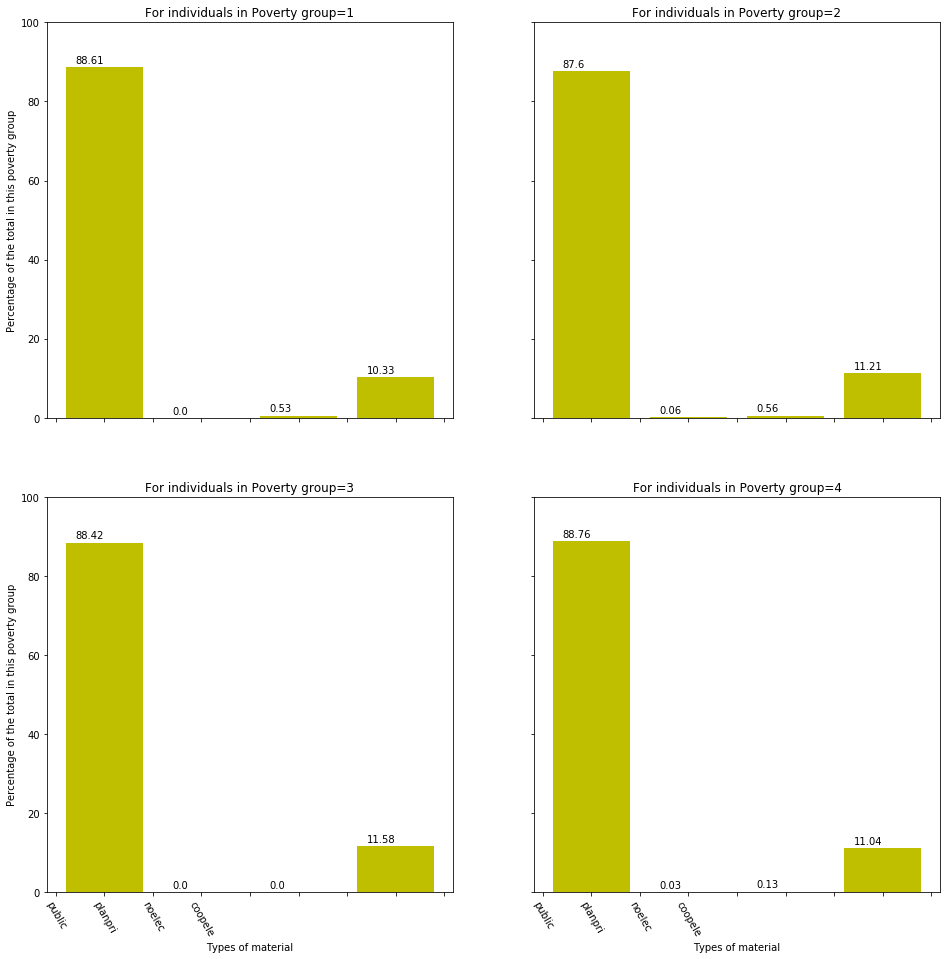

In [23]:
plot_dwelling_property(electricity_df)

* Again, this distribution is also pretty much the same across all the poverty groups. ~88% of the people in all the groups get electricity from `CNFL,  ICE,  ESPH/JASEC` and ~11% get it from cooperative.

### Main source of energy in cooking:

In [24]:
cooking_energy_df = df_train.groupby('Target').sum()[['energcocinar1', 'energcocinar2', 'energcocinar3',
                                                      'energcocinar4']]
cooking_energy_df

,energcocinar1,energcocinar2,energcocinar3,energcocinar4
Target,,,,
1,7,246,404,98
2,3,623,820,151
3,3,526,600,80
4,5,3284,2557,150


```
energcocinar1, =1 no main source of energy used for cooking (no kitchen)
energcocinar2, =1 main source of energy used for cooking electricity
energcocinar3, =1 main source of energy used for cooking gas
energcocinar4, =1 main source of energy used for cooking wood charcoal
```

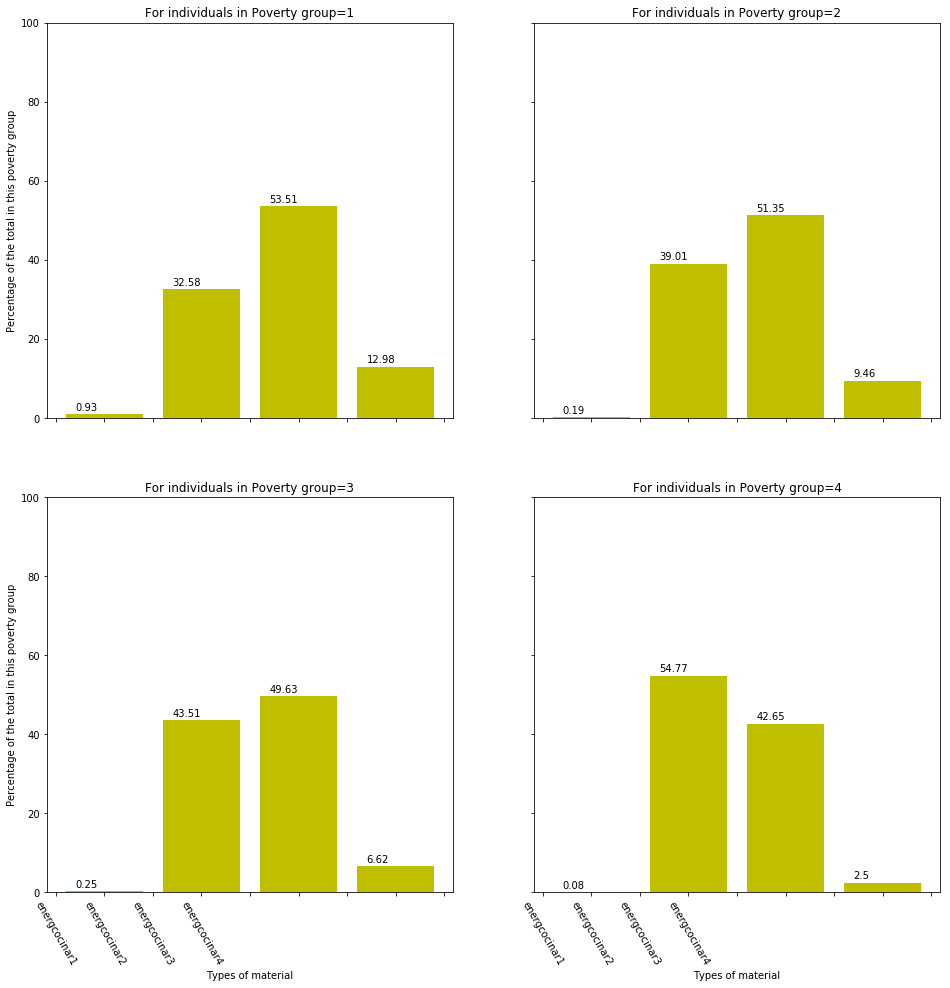

In [25]:
plot_dwelling_property(cooking_energy_df)

* Here, we see that gas and electricity are the major sources of energy in the kitchens for all the people.
* For the poverty group 4 (non-vulnerable), electricity is slightly more popular than gas.
* As we move from group 1 (extreme) to group 4 (non-vulnerable), the popularity of electricity increases and that of gas decreases. 

## Numerical or Categorical?

Number of numerical features:  138
Number of categorical features:  3


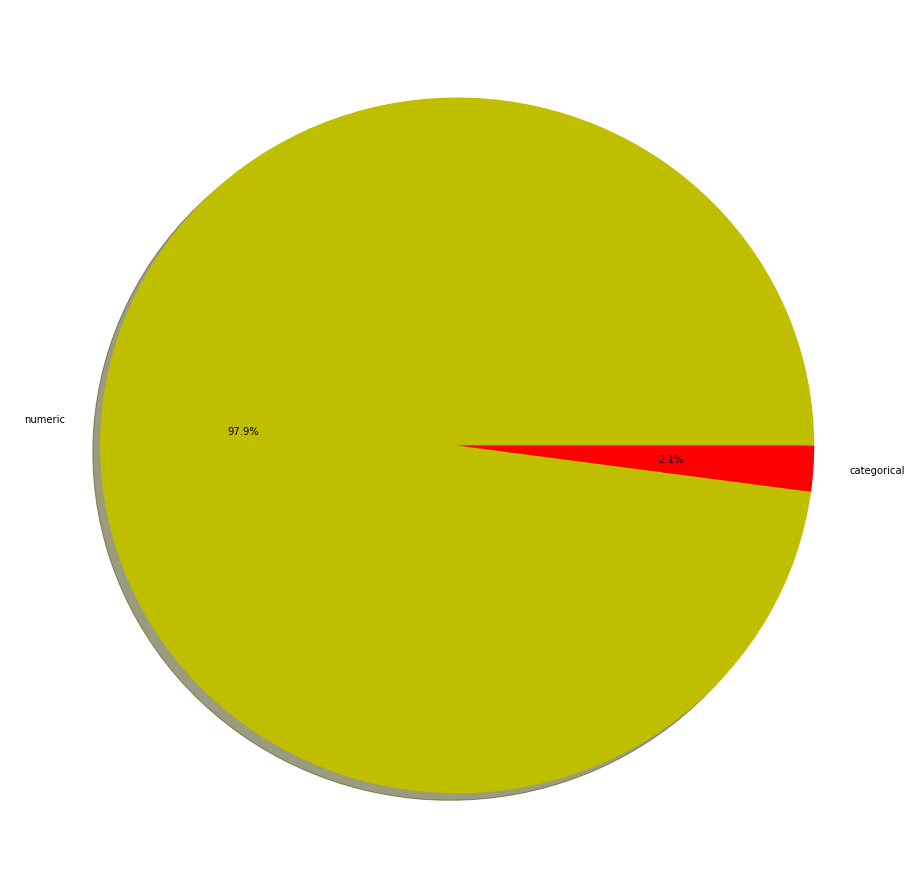

In [26]:
num_features = all_data._get_numeric_data().columns
num_features_length = len(num_features)

categ_features = pd.Index(list(set(all_data.columns) - set(num_features)))
categ_features_length = len(categ_features)

print("Number of numerical features: ", num_features_length)
print("Number of categorical features: ", categ_features_length)

labels = ['numeric', 'categorical']
colors = ['y', 'r']
plt.pie([num_features_length, categ_features_length], 
        labels=labels, 
        autopct='%1.1f%%', 
        shadow=True, 
        colors=colors);
plt.rcParams["figure.figsize"] = [8, 8];

Let's have a look at the 3 categorical features:

In [27]:
all_data[categ_features].head()

,dependency,edjefe,edjefa
0,no,10,no
1,8,12,no
2,8,no,11
3,yes,11,no
4,yes,11,no


According to the [data description provided with the challenge](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data), the above 3 features should take numerical values but they contain lots of 'yes' and 'no' values as well. 

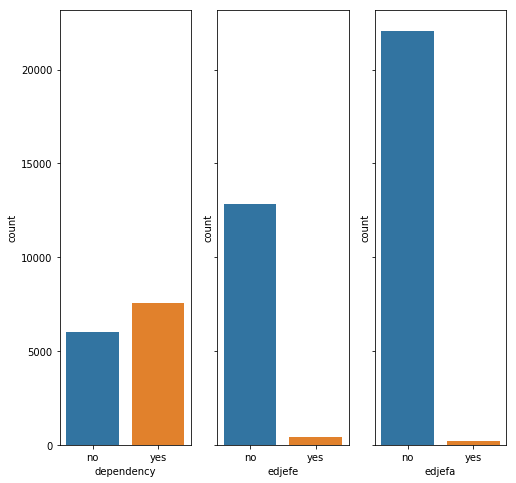

In [28]:
_, axarr = plt.subplots(nrows=1, ncols=3, sharey='row')

for idx, feature in enumerate(categ_features):
    sns.countplot(x=feature, data=all_data[all_data[feature].isin(['yes', 'no'])], ax=axarr[idx])
    
plt.rcParams["figure.figsize"] = [12, 6];

A look at [this discussion](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403#359554) showed that there is a glitch with `dependency`, `edjefe` and `edjefa`. In all of these cases,, 'yes' implies 1 and 'no' implies 0. So, let's fix that..

In [29]:
yes_no_map = {'no': 0, 'yes': 1}
    
all_data['dependency'] = all_data['dependency'].replace(yes_no_map).astype(np.float32)
all_data['edjefe'] = all_data['edjefe'].replace(yes_no_map).astype(np.float32)
all_data['edjefa'] = all_data['edjefa'].replace(yes_no_map).astype(np.float32)

Now, all the features are numeric.

### Numerical features that are binary:

In [30]:
num_binary_features = []

for feature in df_train.columns:
    if sorted(df_train[feature].unique()) in [[0, 1], [0], [1]]:
        num_binary_features.append(feature)
        
print("Total number of binary-numerical features: ", len(num_binary_features))
print("Binary-numerical features: ")
num_binary_features

Total number of binary-numerical features:  102
Binary-numerical features: 


['hacdor',
 'hacapo',
 'v14a',
 'refrig',
 'v18q',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisocemento',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'public',
 'planpri',
 'noelec',
 'coopele',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'epared1',
 'epared2',
 'epared3',
 'etecho1',
 'etecho2',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'dis',
 'male',
 'female',
 'estadocivil1',
 'estadocivil2',
 'estadocivil3',
 'estadocivil4',
 'estadocivil5',
 'estadocivil6',
 'estadocivil7',
 'parentesco1',
 'parentesco2',
 'parentesco3',
 'parentesco4',
 'parentesco5',
 'pare

### Non-binary features:

Total number of non-binary-numerical features:  39
Non-binary numerical features: 


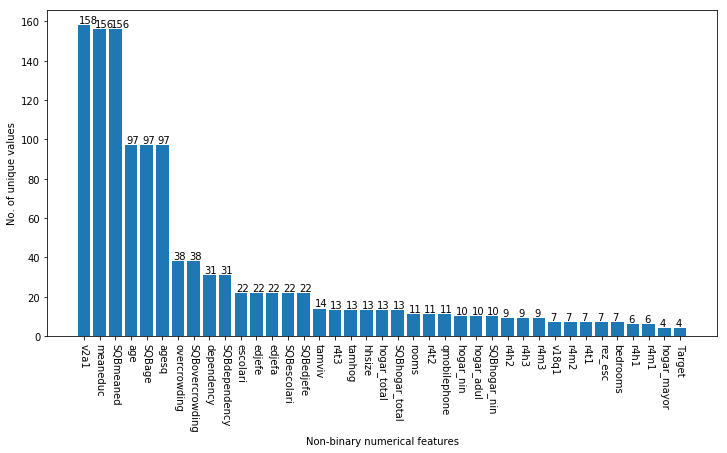

In [31]:
num_non_binary_features = [feature for feature in df_train.columns if feature not in num_binary_features]

print("Total number of non-binary-numerical features: ", len(num_non_binary_features))
print("Non-binary numerical features: ")

num_non_binary_features_dict = {feature: len(df_train[feature].unique()) for feature in num_non_binary_features}

num_non_binary_features_sorted = sorted(num_non_binary_features_dict, 
                                        key=lambda feature: num_non_binary_features_dict[feature], 
                                        reverse=True)

num_non_binary_features_len_sorted = [num_non_binary_features_dict[feature] for feature in num_non_binary_features_sorted]

barplot_with_anotate(num_non_binary_features_sorted, num_non_binary_features_len_sorted);
plt.rcParams["figure.figsize"] = [16, 16];
plt.ylabel("No. of unique values");
plt.xlabel("Non-binary numerical features");

Out of these 39 features, the following are continuous in nature:
* v2al
* meaneduc
* SQBmeaned
* dependency
* SQBdependency


All the other features are discrete in nature.

## Summary

### Binary features:

In [32]:
all_data[num_binary_features].describe()

,hacdor,hacapo,v14a,refrig,v18q,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2
count,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.00000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000
mean,0.047077,0.027055,0.993326,0.960464,0.237782,0.590249,0.077335,0.197558,0.008380,0.109478,0.014066,0.001616,0.001317,0.692754,0.230838,0.001526,0.000389,0.014306,0.060186,0.971119,0.018616,0.002424,0.001646,0.671804,0.962978,0.032263,0.004759,0.881124,0.000449,0.003382,0.113758,0.003711,0.222129,0.756263,0.015862,0.002035,0.002125,0.480502,0.471613,0.045761,0.877503,0.033370,0.085625,0.001616,0.000120,0.001766,0.108880,0.324215,0.566905,0.127555,0.302008,0.570437,0.102086,0.265466,0.632448,0.056984,0.488403,0.511597,0.137821,0.123216,0.27187,0.034777,0.059947,0.033340,0.339030,0.308473,0.186514,0.383952,0.013228,0.008739,0.049771,0.009876,0.002993,0.012809,0.002873,0.012690,0.008081,0.131655,0.173106,0.208033,0.184958,0.112800,0.017837,0.014366,0.142699,0.014306,0.623829,0.104690,0.169156,0.017867,0.084458,0.110646,0.288002,0.977105,0.582647,0.085595,0.070033,0.085446,0.097986,0.078293,0.719630,0.280370
std,0.211808,0.162247,0.081423,0.194868,0.425731,0.491795,0.267127,0.398163,0.091159,0.312243,0.117766,0.040169,0.036265,0.461359,0.421375,0.039039,0.019721,0.118750,0.237835,0.167474,0.135165,0.049177,0.040539,0.469563,0.188817,0.176700,0.068820,0.323647,0.021183,0.058057,0.317522,0.060807,0.415684,0.429343,0.124944,0.045067,0.046049,0.499627,0.499201,0.208969,0.327864,0.179604,0.279814,0.040169,0.010941,0.041985,0.311493,0.468088,0.495511,0.333599,0.459136,0.495021,0.302766,0.441587,0.482146,0.231815,0.499873,0.499873,0.344717,0.328689,0.44493,0.183217,0.237392,0.179526,0.473387,0.461870,0.389527,0.486354,0.114253,0.093075,0.217475,0.098890,0.054626,0.112453,0.053525,0.111933,0.089530,0.338121,0.378

### Non-binary continuous features:

In [33]:
num_conti_features = pd.Index(['v2a1', 'meaneduc', 'dependency', 'SQBmeaned', 'SQBdependency'])
all_data[num_conti_features].describe()

,v2a1,meaneduc,dependency,SQBmeaned,SQBdependency
count,9.150000e+03,33377.000000,33413.000000,33377.000000,33413.000000
mean,1.720308e+05,9.178666,1.172238,101.104384,4.094081
std,1.550035e+05,4.105725,1.649249,90.467735,12.939225
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8.000000e+04,6.000000,0.333333,36.000000,0.111111
50%,1.350000e+05,8.666667,0.666667,75.111115,0.444444
75%,2.000000e+05,11.500000,1.333333,132.250000,1.777778
max,2.852700e+06,37.000000,8.000000,1369.000000,64.000000


### Non-binary discrete features:

In [34]:
num_discrete_features = pd.Index([feature for feature in num_non_binary_features if feature not in num_conti_features])
all_data[num_discrete_features].describe()

,rooms,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,hogar_nin,hogar_adul,hogar_mayor,hogar_total,edjefe,edjefa,bedrooms,overcrowding,qmobilephone,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,agesq,Target
count,33413.000000,7945.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,5832.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,9557.000000
mean,4.955706,1.364003,0.407775,1.562595,1.970371,0.392033,1.658007,2.050040,0.799808,3.220603,4.020411,4.015264,4.127316,7.210726,0.434842,4.015264,1.410858,2.604405,0.291982,4.015264,5.170353,2.827821,2.745069,1.631687,2.835363,34.411097,74.384820,1653.786909,19.118966,53.919343,3.873851,3.474577,1653.786909,3.302292
std,1.519659,0.714483,0.704245,1.003650,1.176670,0.681584,0.908528,1.180957,1.062485,1.376299,1.730911,1.731102,1.877507,4.731904,1.581884,1.731102,1.372366,1.149267,0.603112,1.731102,5.214174,4.606153,0.962491,0.901221,1.455610,21.672040,76.933222,1750.049285,17.737165,77.637447,6.898213,6.053864,1750.049285,1.009565
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.142857,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,1.000000
25%,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000,3.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,2.000000,17.000000,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,289.000000,3.000000
50%,5.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,4.000000,4.000000,4.000000,6.000000,0.000000,4.000000,1.000000,2.000000,0.000000,4.000000,6.000000,0.000000,3.000000,1.500000,3.000000,32.000000,36.000000,1024.000000,16.000000,36.000000,1.000000,2.250000,1024.000000,4.000000
75%,6.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,5.000000,11.000000,0.000000,5.000000,2.000000,3.000000,0.000000,5.000000,9.000000,6.000000,3.000000,2.000000,4.000000,51.000000,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,2601.000000,4.000000
max,15.000000,6.000000,6.000000,8.000000,8.000000,6.000000,8.000000,9.000000,9.000000,11.000000,13.000000,13.000000,19.000000,21.000000,99.000000,13.000000,10.000000,9.000000,5.000000,13.000000,21.000000,21.000000,9.000000,13.000000,11.000000,97.000000,441.000000,9409.000000,169.000000,441.000000,100.000000,169.000000,9409.000000,4.000000


# Preprocessing

## Missing values imputation:

In [35]:
def missing_features(data, column_set):
    incomplete_features = {feature: data.shape[0]-sum(data[feature].value_counts())
                                   for feature in column_set
                                   if not sum(data[feature].value_counts()) == data.shape[0]}
    incomplete_features_sorted = sorted(incomplete_features, key=lambda feature: incomplete_features[feature], reverse=True)
    incompleteness = [round((incomplete_features[feature]/data.shape[0])*100, 2) for feature in incomplete_features_sorted]
    barplot_with_anotate(incomplete_features_sorted, incompleteness)
    plt.ylabel("Percentage (%) of values that are missing")
    plt.rcParams["figure.figsize"] = [12, 6]
    
    for feature, percentage in zip(incomplete_features_sorted, incompleteness):
        print("Feature:", feature)
        print("No. of NaNs:", incomplete_features[feature], "(", percentage, ")")

Feature: rez_esc
No. of NaNs: 27581 ( 82.55 )
Feature: v18q1
No. of NaNs: 25468 ( 76.22 )
Feature: v2a1
No. of NaNs: 24263 ( 72.62 )
Feature: Target
No. of NaNs: 23856 ( 71.4 )
Feature: SQBmeaned
No. of NaNs: 36 ( 0.11 )
Feature: meaneduc
No. of NaNs: 36 ( 0.11 )


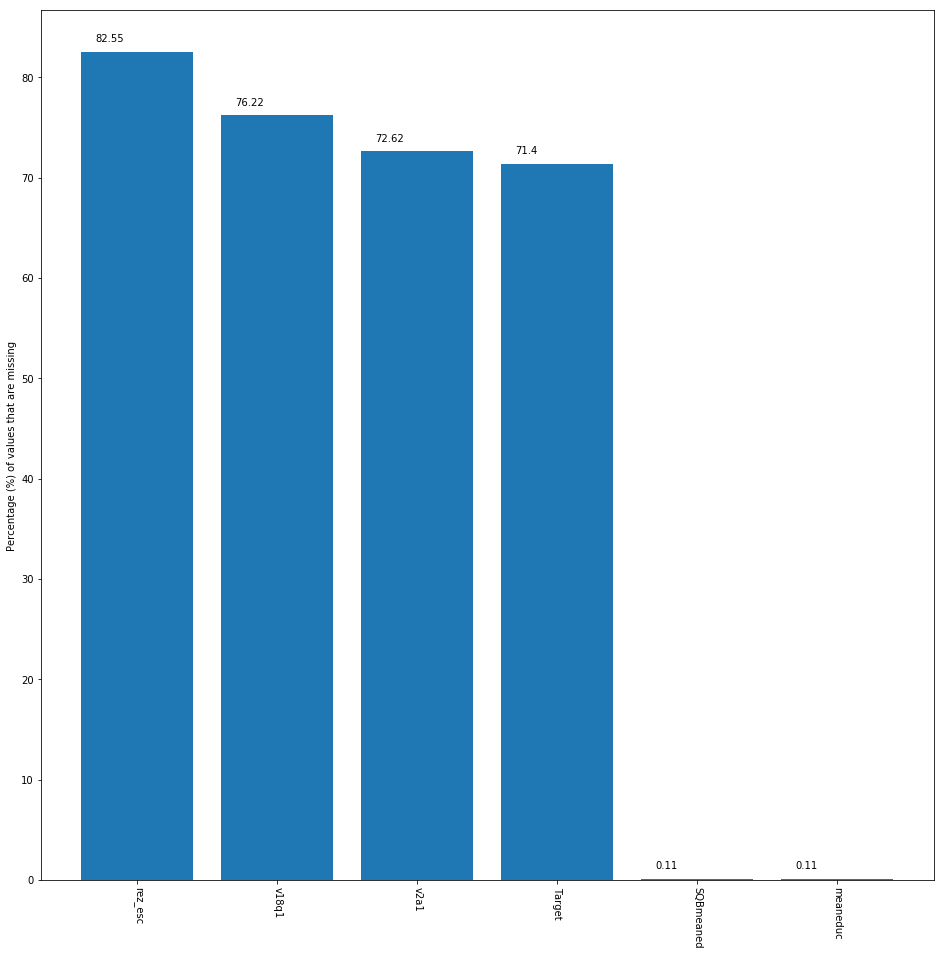

In [36]:
missing_features(all_data, all_data.columns)

* [This discussion](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403#360609) shows how missing values of `v2a1` and `v18q1` should be handled.

* `rez_esc` (Years behind in school): NaN implies that the person does not remember. Considering that along with the large percentage of NaN values, we are better off dropping that column.


* `meaneduc` and `SQBmeaned`: With the average of the columns.

### `v2a1` :-

In [37]:
# entries which have both v2a1 as NaN and tipovivi3 as 0
all_data[['v2a1', 'tipovivi3']][all_data['tipovivi3'] == 0][all_data['v2a1'].isnull()].shape

(24263, 2)

We see that all those entries where `v2a1` is Nan also have `tipovivi3` as 0, which implies that all those houses are not rented. 

Hence, we should fill the missing values of `v2a1` with 0.

In [38]:
# handling v2a1
all_data.loc[:, 'v2a1'].fillna(0, inplace=True)

### `v18q1` :-

In [39]:
# entries which have v18q as 0 and v18q1 as NaN
all_data[['v18q1', 'v18q']][all_data['v18q'] == 0][all_data['v18q1'].isnull()].shape

(25468, 2)

We see that `v18q1` is `NaN` only for those entries which have `v18q` == 0. Thus, `v18q1` is missing only when the house does not have a tablet. 

Hence, we should fill the missing values of `v18q1` with 0.

In [40]:
# handling v18q1
all_data.loc[:, 'v18q1'].fillna(0, inplace=True)

### `meaneduc` and `SQBmeaned` :-

In [41]:
# handling meaneduc and SQBmeaned
all_data.loc[:, 'meaneduc'].fillna(all_data['meaneduc'].mean(), inplace=True)
all_data.loc[:, 'SQBmeaned'].fillna(all_data['SQBmeaned'].mean(), inplace=True)

### `rez_esc` :-

Drop it.

In [42]:
all_data.drop(columns=['rez_esc'], inplace=True)

## Convert to ordinal

These features have order in their meaning:
```
epared1, =1 if walls are bad
epared2, =1 if walls are regular
epared3, =1 if walls are good
etecho1, =1 if roof are bad
etecho2, =1 if roof are regular
etecho3, =1 if roof are good
eviv1, =1 if floor are bad
eviv2, =1 if floor are regular
eviv3, =1 if floor are good
instlevel1, =1 no level of education
instlevel2, =1 incomplete primary
instlevel3, =1 complete primary
instlevel4, =1 incomplete academic secondary level
instlevel5, =1 complete academic secondary level
instlevel6, =1 incomplete technical secondary level
instlevel7, =1 complete technical secondary level
instlevel8, =1 undergraduate and higher education
instlevel9, =1 postgraduate higher education
```
We should use them as ordinal features.

In [43]:
all_data['WallQual'] = all_data['epared1'] + 2*all_data['epared2'] + 3*all_data['epared3']

all_data['RoofQual'] = all_data['etecho1'] + 2*all_data['etecho2'] + 3*all_data['etecho3']

all_data['FloorQual'] = all_data['eviv1'] + 2*all_data['eviv2'] + 3*all_data['eviv3']

all_data['EducationLevel'] = all_data['instlevel1'] + 2*all_data['instlevel2'] + 3*all_data['instlevel3'] + \
    4*all_data['instlevel4'] + 5*all_data['instlevel5'] + 6*all_data['instlevel6'] + 7*all_data['instlevel7'] + \
    8*all_data['instlevel8'] + 9*all_data['instlevel9']

In [44]:
all_data.drop(columns=['epared1', 'epared2', 'epared3',
                       'etecho1', 'etecho2', 'etecho3',
                       'eviv1', 'eviv2', 'eviv3',
                       'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5',
                       'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9'], inplace=True)

# Modelling

In [45]:
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
nvalidate = int(0.2 * ntrain)
ntrain = int(ntrain - nvalidate)

df_train = all_data[:ntrain][:]
df_validate = all_data[ntrain:ntrain+nvalidate][:]
df_test = all_data[ntrain+nvalidate:][:]
df_test = df_test.drop('Target', axis=1)

In [ ]:
print(df_train.shape)
print(df_validate.shape)
print(df_test.shape)

In [ ]:
X_train= df_train.drop('Target', axis= 1)
Y_train= df_train['Target']

X_validate = df_validate.drop('Target', axis=1)
Y_validate = df_validate['Target']

X_test= df_test

In [ ]:
def get_validation_score(model):
    Y_validate_pred = model.predict(X_validate)
    return f1_score(Y_validate, Y_validate_pred, average='macro')

In [ ]:
validation_scores = {}

### Gaussian Naive Bayes:

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train);

In [ ]:
validation_scores['Naive Bayes'] = get_validation_score(naive_bayes_classifier)
print(validation_scores['Naive Bayes'])

### Random Forest:

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train);

In [ ]:
validation_scores['Random Forest'] = get_validation_score(random_forest)
print(validation_scores['Random Forest'])

### SVC:

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train);

In [ ]:
validation_scores['SVC'] = get_validation_score(svc)
print(validation_scores['SVC'])

### LightGBM:

In [ ]:
lightgbm = lgb.LGBMClassifier()
lightgbm.fit(X_train, Y_train);

In [ ]:
validation_scores['LightGBM'] = get_validation_score(lightgbm)
print(validation_scores['LightGBM'])

### XGBoost:

In [ ]:
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, Y_train);

In [ ]:
validation_scores['XGBoost'] = get_validation_score(xgboost)
print(validation_scores['XGBoost'])

## Comparing the various scores:

In [ ]:
models_with_scores = pd.DataFrame({
    'Model': list(validation_scores.keys()),
    'Validation Score': list(validation_scores.values())})

models_with_scores.sort_values(by='Validation Score', ascending=False)

## Submission Model: LightGBM

In [ ]:
final_train = all_data[:ntrain+nvalidate][:]
final_test = all_data[ntrain+nvalidate:][:]

final_train_X = final_train.drop('Target', axis= 1)
final_train_Y = final_train['Target']
final_test_X = final_test.drop('Target', axis=1)

In [ ]:
submission_model = lgb.LGBMClassifier()
submission_model.fit(final_train_X, final_train_Y);
final_pred = submission_model.predict(final_test_X)
final_pred = final_pred.astype(int)

In [ ]:
submission = pd.DataFrame({'Id': test_id,
                           'Target': final_pred})
submission.to_csv('submission.csv', index=False)